In [1]:
import glob, os
import pandas as pd
%load_ext autoreload
%autoreload 2
DATADIR = "twitterdata"

files = glob.glob(os.path.join(DATADIR,"*", "*.csv"))

dfs = []
for file in files:
#     df_ = pd.read_csv(open(file,'rU'), encoding='utf8', engine='c',error_bad_lines=False)
    df_ = pd.read_csv(open(file,'rU'), encoding='utf8', engine='c' ,
#                       encoding='utf8', 
#                       engine='python', 
                      error_bad_lines=False, 
                      parse_dates=True,
                      infer_datetime_format=True,
#                      doublequote=True,
#                      quoting=2
                     )
    df_['manifestolabel_keywords'] = file.split('/')[1]
    dfs.append(df_)
df = pd.concat(dfs).reset_index(drop=True)
df

<ipython-input-1-524f908f0045>:12: DeprecationWarning: 'U' mode is deprecated
  df_ = pd.read_csv(open(file,'rU'), encoding='utf8', engine='c' ,


,username,to,text,retweets,favorites,replies,id,permalink,author_id,formatted_date,hashtags,mentions,geo,urls,url_text,manifestolabel
0,holgertma,NaN,Muss ich es nochmal erklären: enno Lenze retwe...,0.0,4.0,2.0,1.249840e+18,https://twitter.com/holgertma/status/124983963...,7.996216e+17,Mon Apr 13 23:19:25 +0000 2020,NaN,NaN,NaN,NaN,NaN,internationalism -
1,GabiAlbrecht1,Smash2102,Schön hab ihn ja im Laufe meines Lebens schon ...,0.0,1.0,0.0,1.249834e+18,https://twitter.com/GabiAlbrecht1/status/12498...,4.860519e+09,Mon Apr 13 22:56:48 +0000 2020,NaN,NaN,NaN,NaN,NaN,internationalism -
2,KDan83,NaN,"Liebe #Telekom, ich finde es ja sehr nett, wen...",0.0,1.0,1.0,1.249833e+18,https://twitter.com/KDan83/status/124983269725...,3.104356e+09,Mon Apr 13 22:51:50 +0000 2020,#Telekom #PrimeVideo #Danke,NaN,NaN,NaN,NaN,internationalism -
3,temtem781,NaN,THE 7 _paulwittig_ Tag us #bmw_world_ua @Munic...,0.0,0.0,0.0,1.249832e+18,https://twitter.com/temtem781/status/124983172...,1.068689e+09,Mon Apr 13 22:47:58 +0000 2020,#bmw_world_ua,NaN,NaN,https://www.instagram.com/p/B-8DhlHlPdO/?igshi...,NaN,internationalism -
4,Hannover_ETI,NaN,"Falls Trump die US zu früh aufmacht, was er tu...",0.0,8.0,4.0,1.249824e+18,https://twitter.com/Hannover_ETI/status/124982...,3.945033e+07,Mon Apr 13 22:18:45 +0000 2020,NaN,NaN,NaN,NaN,NaN,internationalism -
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264593,Helvetistani,Rassenwahn_Paul,Ich verzichte seit vor dem Lockdown auf sozial...,0.0,1.0,0.0,1.245228e+18,https://twitter.com/Helvetistani/status/124522...,5.356522e+08,Wed Apr 01 05:53:42 +0000 2020,NaN,NaN,NaN,NaN,NaN,economic planning +
264594,Motivationswerk,NaN,Einige von uns nutzen die soziale Distanzierun...,0.0,0.0,0.0,1.245225e+18,https://twitter.com/Motivationswerk/status/124...,5.534314e+08,Wed Apr 01 05:42:51 +0000 2020,NaN,NaN,NaN,https://www.instagram.com/p/B-bUq4lJdjU/?igshi...,NaN,economic planning +
264595,BenjaminWKNFSS,M_Adenia,"Na, weil andere Firmen, die im Prinzip das sel...",0.0,0.0,1.0,1.245215e+18,https://twitter.com/BenjaminWKNFSS/status/1245...,4.516716e+07,Wed Apr 01 05:02:20 +0000 2020,NaN,NaN,NaN,NaN,NaN,economic planning +
264596,rbb24,NaN,Guten Morgen! Heute meldet das Soziale-Medien-...,3.0,29.0,3.0,1.245213e+18,https://twitter.com/rbb24/status/1245213162690...,1.620251e+09,Wed Apr 01 04:55:27 +0000 2020,#Berlin #wirbleibenzuhause #wirbleibenzuhause,NaN,NaN,NaN,NaN,economic planning +


In [2]:
df['date'] = pd.to_datetime(df['formatted_date']).dt.tz_localize(None)

In [3]:
df['before'] = df['date'] < pd.Timestamp(2020,3,15)
df['after'] = df['date'] > pd.Timestamp(2020,3,15)

In [4]:
(df.loc[df['after'],'manifestolabel_keywords'].value_counts() / df.loc[df['before'],'manifestolabel'].value_counts()).sort_values()

social justice +          0.462463
democracy +               0.573031
national way of life -    0.580645
multiculturalism -        0.649439
infrastructure +          0.656696
social harmony +          0.830178
military +                0.851817
marxist analysis +        0.862911
internationalism +        0.887267
political authority +     0.887585
europe -                  0.896064
culture +                 0.911229
anti-imperialism +        0.944595
productivity +            0.953751
anti-growth economy +     0.968889
internationalism -        0.977831
education -               1.000903
nationalization +         1.001577
minority groups +         1.003546
military -                1.007812
national way of life +    1.012085
multiculturalism +        1.024672
economic goals            1.028457
labour -                  1.028603
law and order +           1.045923
foreign special -         1.052831
education +               1.054664
welfare -                 1.062243
agriculture +       

In [5]:
from classifier import score_texts

In [7]:
df['text'] = df['text'].fillna('')
df_scored = score_texts(df)

/Users/felix/anaconda3/envs/covidstate/lib/python3.8/site-packages/sklearn/base.py:313: UserWarning: Trying to unpickle estimator TfidfTransformer from version 0.22.1 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/Users/felix/anaconda3/envs/covidstate/lib/python3.8/site-packages/sklearn/base.py:313: UserWarning: Trying to unpickle estimator TfidfVectorizer from version 0.22.1 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/Users/felix/anaconda3/envs/covidstate/lib/python3.8/site-packages/sklearn/base.py:313: UserWarning: Trying to unpickle estimator SGDClassifier from version 0.22.1 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/Users/felix/anaconda3/envs/covidstate/lib/python3.8/site-packages/sklearn/base.py:313: UserWarning: Trying to unpickle estimato

In [8]:
df_scored

,username,to,text,retweets,favorites,replies,id,permalink,author_id,formatted_date,...,url_text,manifestolabel,date,before,after,domain_proba,domain,rightleft_proba,rightleft,manifestolabel_proba
0,holgertma,NaN,Muss ich es nochmal erklären: enno Lenze retwe...,0.0,4.0,2.0,1.249840e+18,https://twitter.com/holgertma/status/124983963...,7.996216e+17,Mon Apr 13 23:19:25 +0000 2020,...,NaN,gov-admin efficiency +,2020-04-13 23:19:25,False,True,0.302065,Welfare and Quality of Life,0.696011,left,0.141759
1,GabiAlbrecht1,Smash2102,Schön hab ihn ja im Laufe meines Lebens schon ...,0.0,1.0,0.0,1.249834e+18,https://twitter.com/GabiAlbrecht1/status/12498...,4.860519e+09,Mon Apr 13 22:56:48 +0000 2020,...,NaN,social justice +,2020-04-13 22:56:48,False,True,0.361469,Economy,0.792270,right,0.107580
2,KDan83,NaN,"Liebe #Telekom, ich finde es ja sehr nett, wen...",0.0,1.0,1.0,1.249833e+18,https://twitter.com/KDan83/status/124983269725...,3.104356e+09,Mon Apr 13 22:51:50 +0000 2020,...,NaN,gov-admin efficiency +,2020-04-13 22:51:50,False,True,0.261364,Welfare and Quality of Life,0.816564,right,0.100905
3,temtem781,NaN,THE 7 _paulwittig_ Tag us #bmw_world_ua @Munic...,0.0,0.0,0.0,1.249832e+18,https://twitter.com/temtem781/status/124983172...,1.068689e+09,Mon Apr 13 22:47:58 +0000 2020,...,NaN,environmentalism +,2020-04-13 22:47:58,False,True,0.377977,Economy,0.611694,left,0.132020
4,Hannover_ETI,NaN,"Falls Trump die US zu früh aufmacht, was er tu...",0.0,8.0,4.0,1.249824e+18,https://twitter.com/Hannover_ETI/status/124982...,3.945033e+07,Mon Apr 13 22:18:45 +0000 2020,...,NaN,economic goals,2020-04-13 22:18:45,False,True,0.371951,Economy,0.708385,left,0.100220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264593,Helvetistani,Rassenwahn_Paul,Ich verzichte seit vor dem Lockdown auf sozial...,0.0,1.0,0.0,1.245228e+18,https://twitter.com/Helvetistani/status/124522...,5.356522e+08,Wed Apr 01 05:53:42 +0000 2020,...,NaN,social justice +,2020-04-01 05:53:42,False,True,0.509028,Welfare and Quality of Life,0.740963,left,0.164305
264594,Motivationswerk,NaN,Einige von uns nutzen die soziale Distanzierun...,0.0,0.0,0.0,1.245225e+18,https://twitter.com/Motivationswerk/status/124...,5.534314e+08,Wed Apr 01 05:42:51 +0000 2020,...,NaN,social justice +,2020-04-01 05:42:51,False,True,0.460645,Welfare and Quality of Life,0.679273,left,0.130694
264595,BenjaminWKNFSS,M_Adenia,"Na, weil andere Firmen, die im Prinzip das sel...",0.0,0.0,1.0,1.245215e+18,https://twitter.com/BenjaminWKNFSS/status/1245...,4.516716e+07,Wed Apr 01 05:02:20 +0000 2020,...,NaN,social justice +,2020-04-01 05:02:20,False,True,0.462210,Welfare and Quality of Life,0.520731,left,0.244139
264596,rbb24,NaN,Guten Morgen! Heute meldet das Soziale-Medien-...,3.0,29.0,3.0,1.245213e+18,https://twitter.com/rbb24/status/1245213162690...,1.620251e+09,Wed Apr 01 04:55:27 +0000 2020,...,NaN,political authority +,2020-04-01 04:55:27,False,True,0.650300,Welfare and Quality of Life,0.584657,left,0.116098


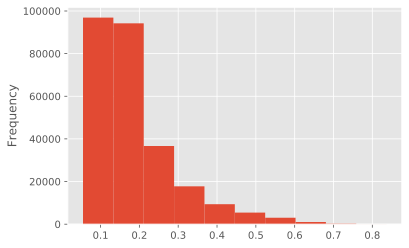

In [16]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
plt.style.use('ggplot')
df['manifestolabel_proba'].plot.hist()

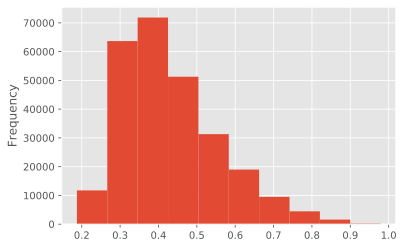

In [18]:
df['domain_proba'].plot.hist()

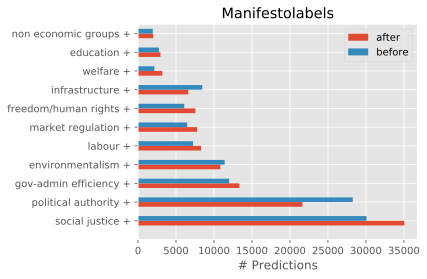

In [79]:

pd.DataFrame(
    [df.loc[df['after'],'manifestolabel'].value_counts(), 
     df.loc[df['before'],'manifestolabel'].value_counts()],
    index=['after','before']).T.plot.barh()

plt.ylim([-1,10.5])
plt.title('Manifestolabels')
plt.xlabel('# Predictions')
plt.tight_layout()
plt.savefig('manifestolabels_before_after.pdf')

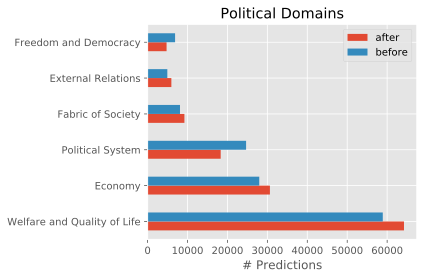

In [78]:
pd.DataFrame(
    [df.loc[df['after'],'domain'].value_counts(), 
     df.loc[df['before'],'domain'].value_counts()],
    index=['after','before']).T.plot.barh()
plt.title('Political Domains')
plt.xlabel('# Predictions')
plt.tight_layout()
plt.savefig('domains_before_after.pdf')

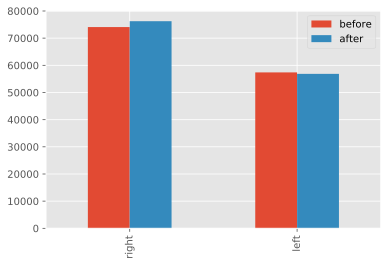

In [56]:
pd.DataFrame(
    [df.loc[df['before'],'rightleft'].value_counts(), 
     df.loc[df['after'],'rightleft'].value_counts()],
    index=['before','after']).T.plot.bar()
